# Install required packages

In [ ]:
# Uninstall all packages
# Useful if packages get incompatible
#!pip freeze | cut -d "@" -f1 | xargs pip uninstall -y

In [ ]:
!pip install git+https://github.com/yjgeno/GenKI.git

In [ ]:
!pip install anndata

In [ ]:
#!pip install scanpy

In [ ]:
# Force reinstall packages
#pip install --force-reinstall matplotlib

In [ ]:
#%pip install --upgrade --force scanpy matplotlib
#%pip install mygene

In [ ]:
%pip install torch_geometric
%pip install torch

In [ ]:
#!pip install --upgrade pip

In [ ]:
!pip install typing-extensions>=4.6.0

In [ ]:
#%pip install pybiomart

In [ ]:
%pip install igraph

# Load required packages

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
#from pybiomart import Dataset
#import mygene
import json
import igraph

In [ ]:
import GenKI as gk
from GenKI.preprocesing import build_adata
from GenKI.dataLoader import DataLoader
from GenKI.train import VGAE_trainer
from GenKI import utils

%load_ext autoreload
%autoreload 2

In [37]:
sc.settings.verbosity = 0
pd.set_option('display.max_rows', 100) # display max rows
#pd.set_option('display.max_columns', None) # display max columns
#sc.settings.set_figure_params(
#    dpi=300,           # High resolution
    #facecolor='white', # White background
#    figsize=(8, 6),    # Figure size (width, height)
#    frameon=False,     # Remove frame around plots
#    transparent=True   # Transparent background when saving
#) # Parameters to save scanpy figures

# Load data & create sc object

In [38]:
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)

# Change the current directory
os.chdir('/home/jupyter/ExperimentOne/')

# Set scanpy save directory
#sc.settings.figdir = './Fig/' 

/home/jupyter/ExperimentOne


In [ ]:
## Input files in this workflow were imported from:
# https://github.com/jkleinj/RNAseq-BlaCy_pub

In [39]:


# Step 1: Load the gene expression matrix
# Assuming genes are in rows and cells are in columns
# The first column contains gene names/IDs
expression_df = pd.read_csv('Input/genali.quality', index_col=0, sep= " ")


# Step 2: Load the metadata
# Assuming cell IDs in metadata match column names in expression matrix
metadata_df = pd.read_csv('Input/SupplementaryTable2_samples_meta.csv', 
                          index_col=0)

# Step 3: Load the normalized counts
norm_df = pd.read_csv('Input/RUV.bln.counts', index_col=0, sep= " ")


In [40]:
display(expression_df.head(5))
display(metadata_df.head(5))
display(norm_df.head(5))

,FogA100,FogA104,FogA105,FogA106,FogA107,FogA108,FogA109,FogA010,FogA110,FogA111,...,FogA088,FogA089,FogA008,FogA090,FogA091,FogA092,FogA093,FogA096,FogA097,FogA009
gene_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0,1371,913,978,0,3534,152,1,1582,1089,...,0,0,15,0,1,0,522,0,0,0
ENSG00000000419,0,938,1737,566,590,578,670,0,2074,1615,...,0,0,0,1,1,996,2231,983,0,0
ENSG00000000457,0,167,1167,0,0,0,0,0,106,0,...,0,0,0,0,0,0,113,0,0,0
ENSG00000000460,0,865,277,311,0,0,277,0,78,458,...,0,0,0,0,0,0,245,0,0,0
ENSG00000001036,4,20,329,499,1251,0,0,0,461,249,...,0,0,481,1599,0,0,13,0,0,0


,sample_ID,cell_ID,cell_type,smp_ID,CRISPR,embryo,library_ID,alt_cell_ID,read_counts,mapping_rate
sample_nr,,,,,,,,,,
1,FogA007,WT_C8.8,WT,7,yes,C8,NFC,CX,100512,73.7
2,FogA008,WT_C8.9,WT,8,yes,C8,NFC37,C8.9,5107767,54.3
3,FogA009,WT_C8.10,WT,9,yes,C8,NFC38,C8.10,7220869,51.9
4,FogA010,WT_C8.11,WT,10,yes,C8,NFC39,C8.11,52045,32.4
5,FogA011,WT_7.1,WT,11,no,7,NFC40,7.1,8496788,74.3


,FogA100,FogA104,FogA105,FogA106,FogA107,FogA108,FogA109,FogA010,FogA110,FogA111,...,FogA088,FogA089,FogA008,FogA090,FogA091,FogA092,FogA093,FogA096,FogA097,FogA009
ENSG00000000003,0,497,285,1348,0,1966,31,1812,1101,476,...,0,0,278,0,899,0,369,0,0,0
ENSG00000000419,0,379,949,876,579,141,631,0,1778,1040,...,0,0,0,490,901,1008,2608,568,0,0
ENSG00000000457,0,0,258,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000460,0,128,1,518,0,0,122,0,0,50,...,0,0,0,0,0,0,3,0,0,0
ENSG00000001036,532,0,1,660,1073,0,0,0,161,3,...,0,0,655,3041,0,0,0,0,0,0


In [41]:
# Print column names to examine what we're working with
print("Metadata columns:", metadata_df.columns.tolist())

# Let's check what's actually in our sample_ID column
print("First few sample IDs:", metadata_df['sample_ID'].head().tolist())

# Check what's in our expression matrix columns
print("First few expression matrix columns:", list(expression_df.columns)[:5])

# Find the common IDs between the two datasets
common_ids = set(expression_df.columns).intersection(set(metadata_df['sample_ID']))
print(f"Number of common IDs: {len(common_ids)}")

# Set the sample_ID as the index for metadata
metadata_df = metadata_df.set_index('sample_ID')

Metadata columns: ['sample_ID', 'cell_ID', 'cell_type', 'smp_ID', 'CRISPR', 'embryo', 'library_ID', 'alt_cell_ID', 'read_counts', 'mapping_rate']
First few sample IDs: ['FogA007', 'FogA008', 'FogA009', 'FogA010', 'FogA011']
First few expression matrix columns: ['FogA100', 'FogA104', 'FogA105', 'FogA106', 'FogA107']
Number of common IDs: 83


In [5]:

# Create AnnData object with only the common cells
if len(common_ids) > 0:
    # Filter expression matrix to only include the common cells
    expression_common = expression_df[list(common_ids)]
    norm_common = norm_df[list(common_ids)]
    
    # Create AnnData object
    adata = ad.AnnData(
        X=expression_common.values.T,  # Transpose because AnnData expects cells in rows
        obs=metadata_df.loc[list(common_ids)],  # Get only matching cell metadata
        var=pd.DataFrame(index=expression_df.index)  # Gene metadata
    )
    
    
    
    # Add gene names as a separate column
    #adata.var['Ensembl'] = expression_df['Ensembl']
    
    # Add the normalized values as a layer
    adata.layers['norm'] = norm_common.values.T # add norm values required for GenKi
    
    # Save as H5AD file
    adata.write('data.h5ad')
    
    # Verify the object
    print(f"AnnData object: {adata}")
    print(f"Number of cells: {adata.n_obs}")
    print(f"Number of genes: {adata.n_vars}")
    print(f"Metadata columns: {list(adata.obs.columns)}")
    print("Norm layer dimensions:", adata.layers['norm'].shape)
else:
    print("ERROR: No matching cell IDs found between expression matrix and metadata!")
    print("Check if the cell IDs use the same format in both files.")

AnnData object: AnnData object with n_obs × n_vars = 83 × 15036
    obs: 'cell_ID', 'cell_type', 'smp_ID', 'CRISPR', 'embryo', 'library_ID', 'alt_cell_ID', 'read_counts', 'mapping_rate'
    layers: 'norm'
Number of cells: 83
Number of genes: 15036
Metadata columns: ['cell_ID', 'cell_type', 'smp_ID', 'CRISPR', 'embryo', 'library_ID', 'alt_cell_ID', 'read_counts', 'mapping_rate']
Norm layer dimensions: (83, 15036)


/tmp/ipykernel_164/2550274553.py:8: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(


In [42]:
adata.obs.head(100)

,cell_ID,cell_type,smp_ID,CRISPR,embryo,library_ID,alt_cell_ID,read_counts,mapping_rate,n_genes_by_counts,...,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,mt_status
sample_ID,,,,,,,,,,,,,,,,,,,,,
FogA125,WT_C16.6,WT,125,yes,C16,NFC80,C16.6,7078969,59.9,8298,...,110228.0,11.610315,1.561404,248116.0,12.421656,3.514618,704.0,6.558198,0.009972,Low
FogA044,KO_C12.10,KO,44,yes,C12,NFC73,C12.10,5944372,39.7,5053,...,1182540.0,13.983176,19.914555,682566.0,13.433616,11.494747,1.0,0.693147,0.000017,Low
FogA087,WT_C7.2,WT,87,yes,C8,NFC19,C8.2,7207942,61.8,5205,...,3708070.0,15.126022,51.498558,125175.0,11.737476,1.738460,5.0,1.791759,0.000069,High
FogA019,WT_8TE.1,WT,19,no,8,NFC48,8.TE_1,7747143,66.5,12471,...,1995596.0,14.506454,25.816116,219101.0,12.297293,2.834410,342.0,5.837730,0.004424,Low
FogA017,WT_8.3,WT,17,no,8,NFC46,8.3,6524843,67.8,8075,...,1295298.0,14.074252,19.887897,257753.0,12.459761,3.957518,1.0,0.693147,0.000015,Low
FogA016,WT_8.2,WT,16,no,8,NFC45,8.2,4376661,69.3,9079,...,573933.0,13.260270,13.129990,157069.0,11.964447,3.593302,19.0,2.995732,0.000435,Low
FogA007,WT_C8.8,WT,7,yes,C8,NFC,CX,100512,73.7,8123,...,4930.0,8.503297,4.918687,2648.0,7.881938,2.641923,11.0,2.484907,0.010975,Low
FogA030,WT_7TE.3,WT,30,no,7,NFC59,7TE.3,9443362,72.0,10061,...,603603.0,13.310674,6.401822,221528.0,12.308309,2.349529,1780.0,7.484930,0.018879,Low
FogA025,KO_C12.5,KO,25,yes,C12,NFC54,C12.5,1158527,8.6,2311,...,304747.0,12.627240,26.352463,73215.0,11.201169,6.331139,13.0,2.639057,0.001124,Low


# Genes annotation

In [35]:
# Import dataset containing gene IDs and symbols from the original experiment
gene_ID_df = pd.read_csv('Input/deseq_KO_vs_uninjected_control.csv', 
                      index_col=0, sep= "\t")

gene_ID_df = gene_ID_df.reset_index()  # Convert current index (symbols) to a column
gene_ID_df = gene_ID_df.set_index('Ensembl') # Make gene ID as index
display(gene_ID_df.head(5))

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Ensembl,,,,,,,
ENSG00000113196,HAND1,355.554745,-10.867892,1.238380,-8.775895,1.700000e-18,2.380000e-14
ENSG00000130203,APOE,41354.577040,6.396288,0.764245,8.369418,5.790000e-17,4.060000e-13
ENSG00000101665,SMAD7,101.937726,-9.619886,1.207156,-7.969052,1.600000e-15,7.470000e-12
ENSG00000122756,CNTFR,87.495619,10.738447,1.386428,7.745407,9.530000e-15,3.340000e-11
ENSG00000154764,WNT7A,79.173800,-9.664801,1.350738,-7.155198,8.360000e-13,2.120000e-09


In [7]:
# Import dataset from HUGO database as double check
HUGO = pd.read_csv('Input/HUGO_symbols.txt', sep='\t', low_memory=False)
HUGO = HUGO.set_index('ensembl_gene_id')
display(HUGO)

,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,...,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_id,lncipedia,gtrnadb,agr,mane_select,gencc
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000121410,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:5,ENST00000263100.8|NM_130786.4,NaN
ENSG00000268895,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,NaN,...,NaN,NaN,NaN,NaN,URS00007E4F6E,A1BG-AS1,NaN,HGNC:37133,NaN,NaN
ENSG00000148584,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q11.23,10q11.23,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:24086,ENST00000373997.8|NM_014576.4,NaN
ENSG00000175899,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:7,ENST00000318602.12|NM_000014.6,HGNC:7
ENSG00000245105,HGNC:27057,A2M-AS1,A2M antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,NaN,...,NaN,NaN,NaN,NaN,URS00001F234A,A2M-AS1,NaN,HGNC:27057,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000164434,HGNC:3562,FABP7,fatty acid binding protein 7,protein-coding gene,gene with protein product,Approved,6q22.31,06q22.31,B-FABP|BLBP,brain lipid binding protein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:3562,ENST00000368444.8|NM_001446.5,NaN
ENSG00000226766,HGNC:41951,FABP7P1,fatty acid binding protein 7 pseudogene 1,pseudogene,pseudogene,Approved,1q44,01q44,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:41951,NaN,NaN
ENSG00000235129,HGNC:41952,FABP7P2,fatty acid binding protein 7 pseudogene 2,pseudogene,pseudogene,Approved,2q11.1,02q11.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:41952,NaN,NaN


In [8]:
# Create dictionaries for both annotation sources
gene_dict_experimental = dict(zip(gene_ID_df.index, gene_ID_df['Gene']))
gene_dict_hugo = dict(zip(HUGO.index, HUGO['symbol']))


In [9]:

# Create prioritized annotation function
def get_prioritized_symbol(gene_id):
    # First try experimental data (gene_ID_df)
    if gene_id in gene_dict_experimental:
        return gene_dict_experimental[gene_id]
    # Then try HUGO
    elif gene_id in gene_dict_hugo:
        return gene_dict_hugo[gene_id]
    # Finally keep original Ensembl ID
    else:
        return gene_id

# Apply the prioritized mapping
adata.var['symbol'] = [get_prioritized_symbol(gene_id) for gene_id in adata.var_names]

In [10]:
display(adata.var['symbol'].head(10))

gene_ID
ENSG00000000003      TSPAN6
ENSG00000000419        DPM1
ENSG00000000457       SCYL3
ENSG00000000460    C1orf112
ENSG00000001036       FUCA2
ENSG00000001084        GCLC
ENSG00000001167        NFYA
ENSG00000001460       STPG1
ENSG00000001461      NIPAL3
ENSG00000001497       LAS1L
Name: symbol, dtype: object

In [11]:
# Make a copy of the current var names as 'ensembl_id'
adata.var['Ensembl'] = adata.var_names.copy()

# Now set the var_names to be the symbols
adata.var_names = adata.var['symbol']


In [12]:
# Set the var_names_make_unique parameter
# This ensures all var names are unique if there are still duplicates
adata.var_names_make_unique()

In [13]:
# Make sure of target gene symbol
adata.var[adata.var['Ensembl'] == 'ENSG00000204531']

,symbol,Ensembl
symbol,,
POU5F1,POU5F1,ENSG00000204531


In [ ]:
# Save & load
#adata.write('Fogarty sc object.h5ad')
#adata = ad.read_h5ad("Fogarty sc object.h5ad")
#adata

# Quality control

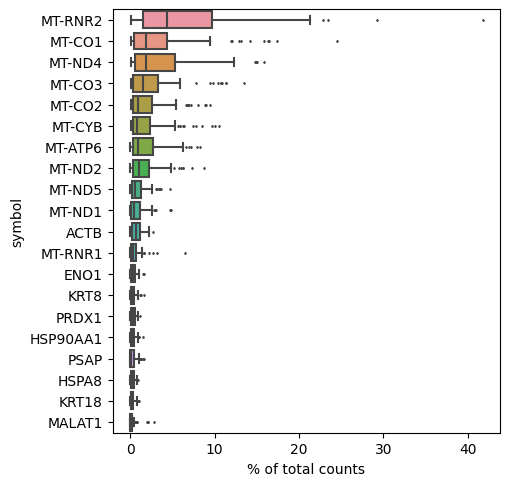

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20, show=False)
plt.savefig('Fig/Fogarty_top_genes.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [17]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [18]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [22]:
adata

AnnData object with n_obs × n_vars = 83 × 15036
    obs: 'cell_ID', 'cell_type', 'smp_ID', 'CRISPR', 'embryo', 'library_ID', 'alt_cell_ID', 'read_counts', 'mapping_rate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'symbol', 'Ensembl', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'norm'

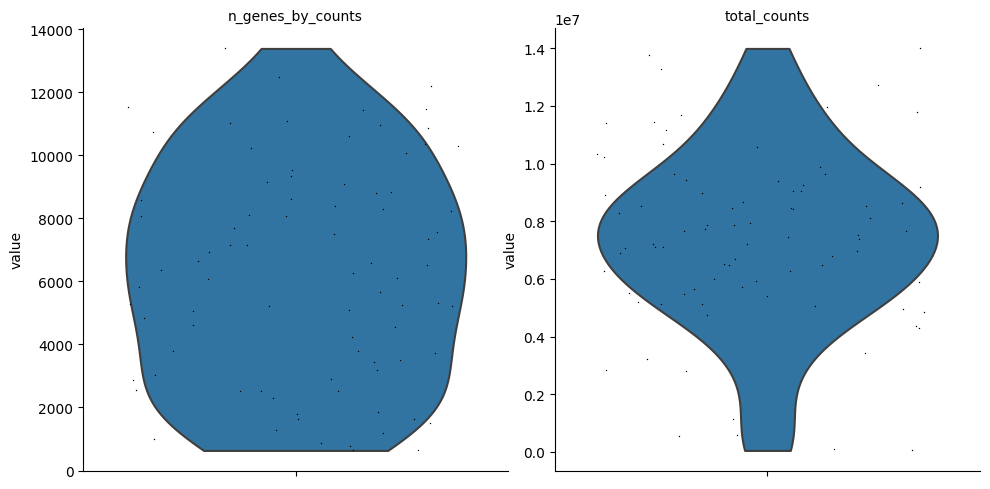

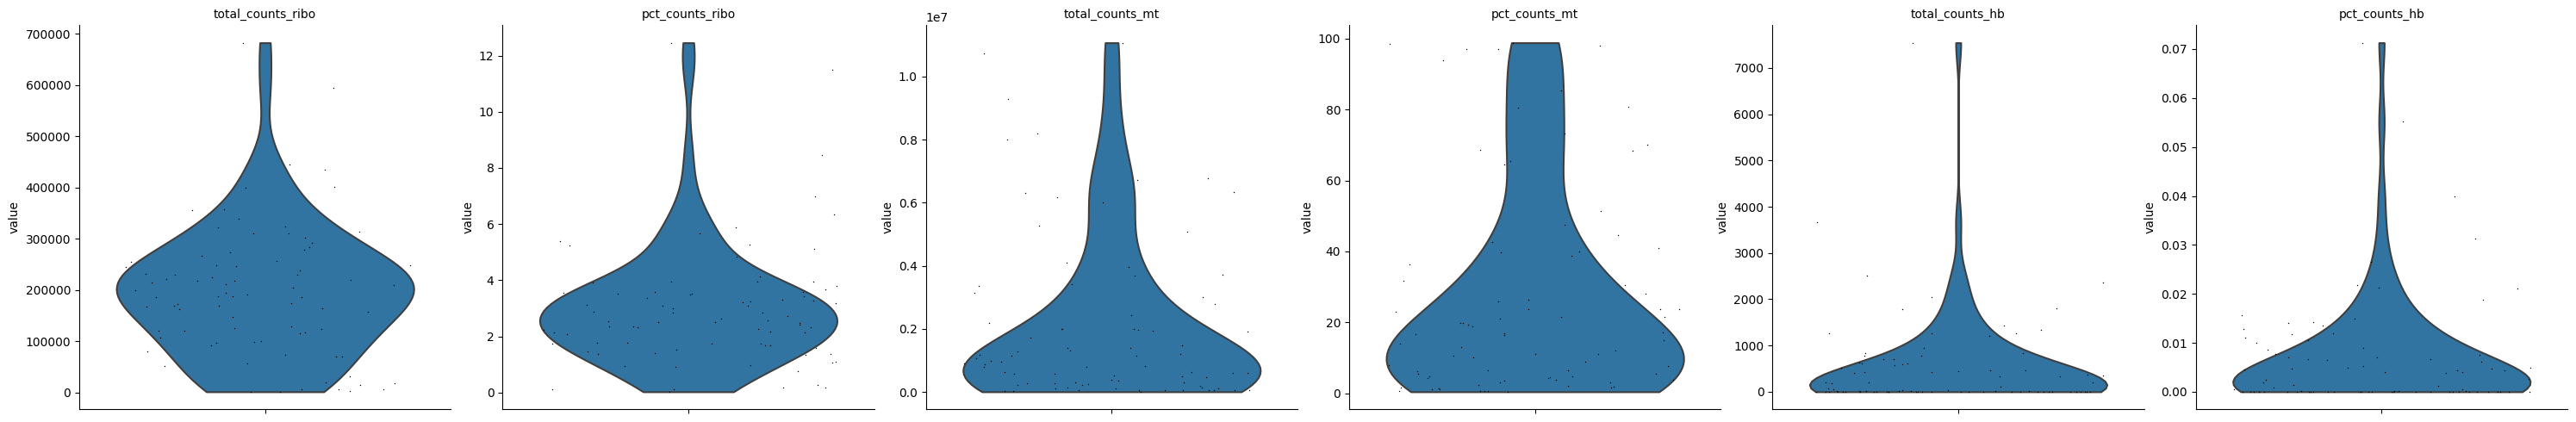

In [23]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)
sc.pl.violin(
    adata,
    ["total_counts_ribo", "pct_counts_ribo",
     "total_counts_mt","pct_counts_mt",
    "total_counts_hb", "pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
)

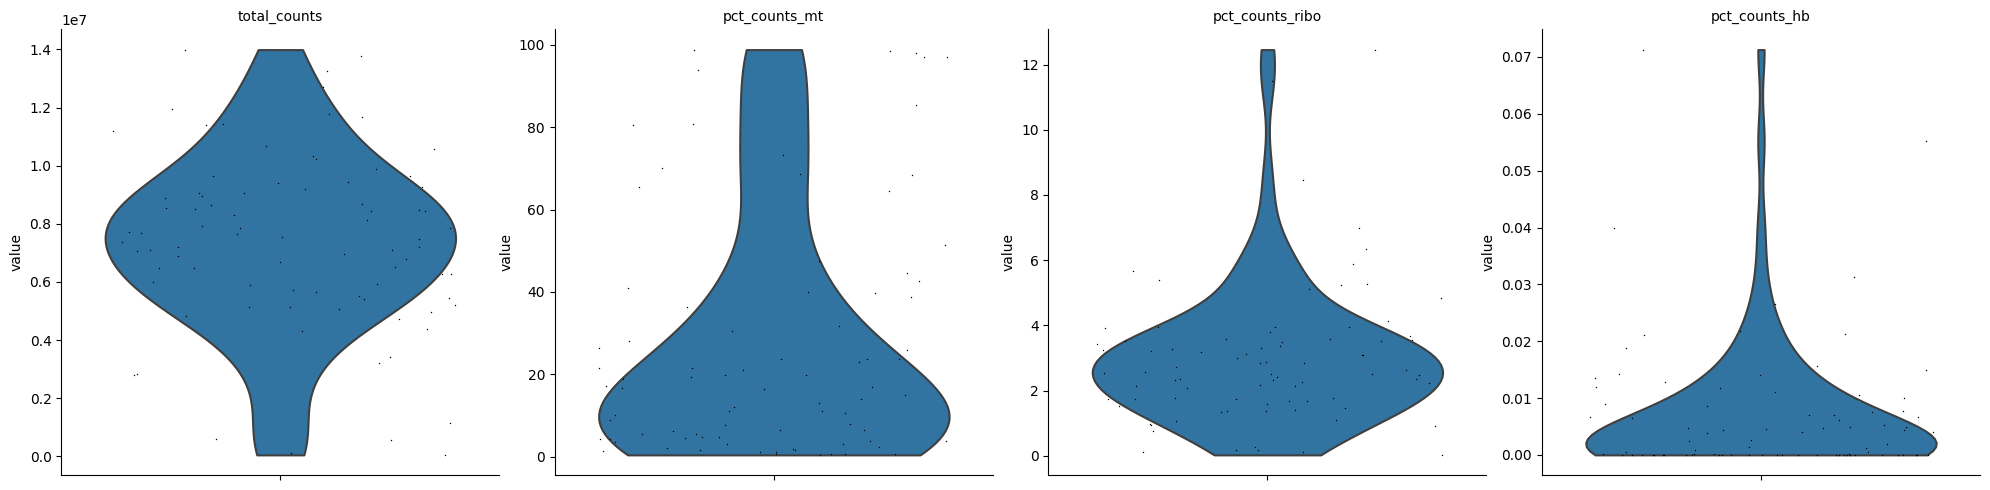

In [25]:
sc.pl.violin(
    adata,
    ["total_counts", "pct_counts_mt","pct_counts_ribo", "pct_counts_hb" ],
    jitter=0.4,
    multi_panel=True,
    show= False
)
plt.savefig('Fig/Fogarty_counts.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

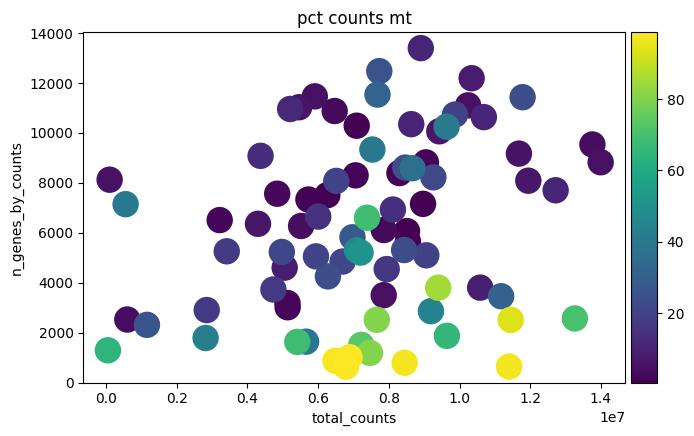

In [20]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

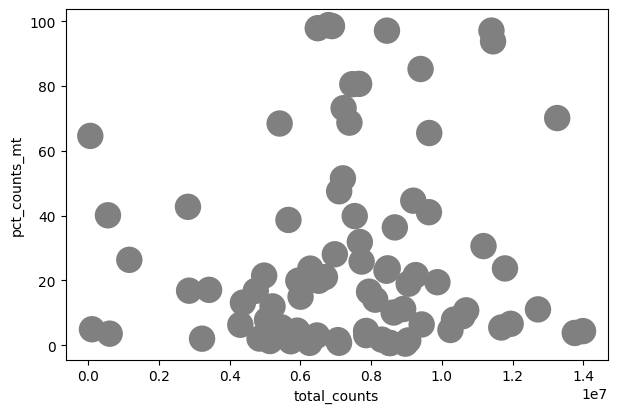

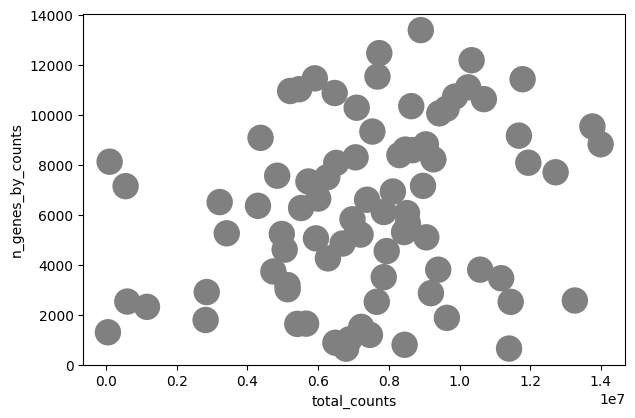

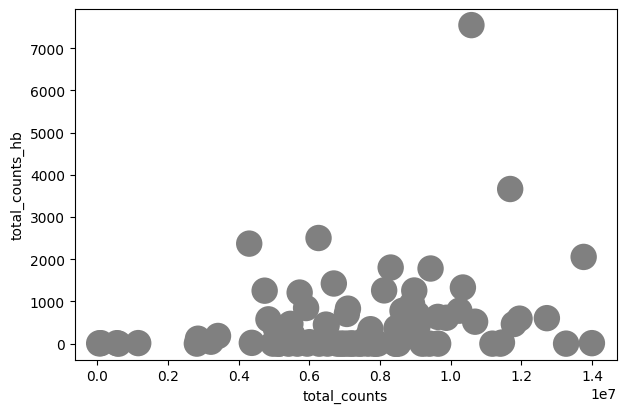

In [26]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")
sc.pl.scatter(adata, x="total_counts", y= "total_counts_hb")

In [43]:
# Prcentage of mitcohondial genes per cell
display(adata.obs['pct_counts_mt'].describe())

# Determine cells with high mt genes
high_mt_cells = adata.obs[adata.obs['pct_counts_mt'] > 50].index
display(adata.obs.loc[high_mt_cells])

# percentage of cells with high mt 
percentage_high_mt_25 = ((adata.obs['pct_counts_mt'] > 25).sum() / adata.n_obs) * 100
percentage_high_mt_50 = ((adata.obs['pct_counts_mt'] > 50).sum() / adata.n_obs) * 100
percentage_high_mt_90 = ((adata.obs['pct_counts_mt'] > 90).sum() / adata.n_obs) * 100
display(percentage_high_mt_25)
display(percentage_high_mt_50)
display(percentage_high_mt_90)

count    83.000000
mean     27.445578
std      29.450401
min       0.474598
25%       4.593110
50%      16.823866
75%      39.974354
max      98.804848
Name: pct_counts_mt, dtype: float64

,cell_ID,cell_type,smp_ID,CRISPR,embryo,library_ID,alt_cell_ID,read_counts,mapping_rate,n_genes_by_counts,...,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,mt_status
sample_ID,,,,,,,,,,,,,,,,,,,,,
FogA087,WT_C7.2,WT,87,yes,C8,NFC19,C8.2,7207942,61.8,5205,...,3708070.0,15.126022,51.498558,125175.0,11.737476,1.738460,5.0,1.791759,0.000069,High
FogA015,WT_8.1_B,WT,15,no,8,NFC44,8.1,8446593,60.5,793,...,8201019.0,15.919769,97.093536,15333.0,9.637828,0.181531,0.0,0.000000,0.000000,High
FogA012,WT_7.2,WT,12,no,7,NFC41,7.2,7466063,56.2,1188,...,6013995.0,15.609600,80.559227,70466.0,11.162900,0.943913,0.0,0.000000,0.000000,High
FogA028,WT_8.6,WT,28,no,8,NFC57,8.6,7398686,68.2,6600,...,5073215.0,15.439486,68.701080,108092.0,11.590747,1.463773,1.0,0.693147,0.000014,High
FogA090,KO_C8.5,KO,90,yes,C8,NFC3,C8.5,7666282,64.2,2514,...,6178232.0,15.636543,80.666443,57835.0,10.965366,0.755126,0.0,0.000000,0.000000,High
FogA010,WT_C8.11,WT,10,yes,C8,NFC39,C8.11,52045,32.4,1293,...,33589.0,10.421984,64.601685,1860.0,7.528869,3.577336,7.0,2.079442,0.013463,High
FogA086,WT_C8.1,WT,86,yes,C8,NFC18,C8.1,6488412,65.5,874,...,6349223.0,15.663843,97.858047,1878.0,7.538495,0.028945,434.0,6.075346,0.006689,High
FogA022,WT_C12.2,WT,22,yes,C12,NFC51,C12.2,9647196,55.1,1871,...,6315649.0,15.658542,65.494171,163536.0,12.004794,1.695891,0.0,0.000000,0.000000,High
FogA031,KO_C8.13,KO,31,yes,C8,NFC60,C8.13,9403514,61.0,3799,...,8012165.0,15.896472,85.257965,100957.0,11.522460,1.074290,0.0,0.000000,0.000000,High


34.93975903614458

19.27710843373494

7.228915662650602

In [28]:
# Prcentage of ribosomal genes per cell
display(adata.obs['pct_counts_ribo'].describe())

count    83.000000
mean      2.980152
std       2.140596
min       0.028945
25%       1.717176
50%       2.559438
75%       3.567349
max      12.458632
Name: pct_counts_ribo, dtype: float64

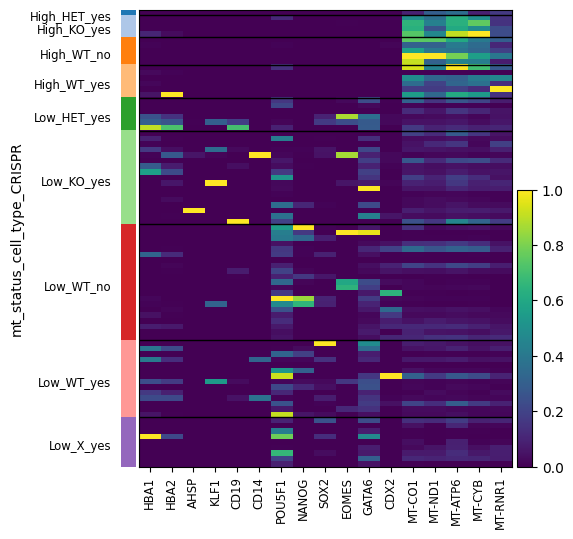

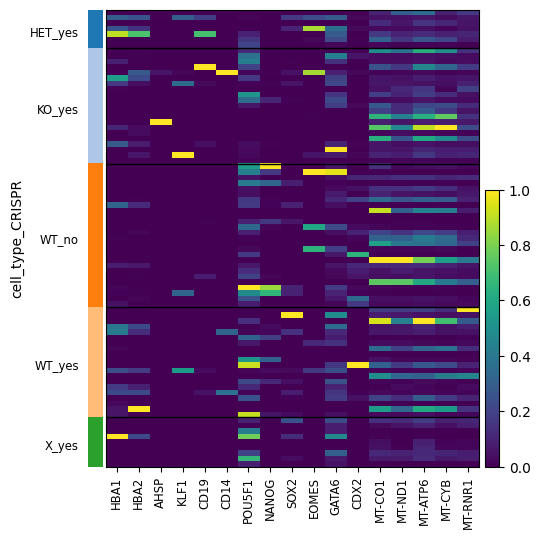

In [30]:
# Define marker genes for different cell types
erythroid_markers = ['HBA1', 'HBA2', 'AHSP', 'KLF1']
mt_markers = ['MT-CO1','MT-ND1','MT-ATP6', 'MT-CYB', 'MT-RNR1']
immune_markers = [ 'CD19', 'CD14']
embryonic_markers = ['POU5F1', 'NANOG', 'SOX2', 'EOMES', 'GATA6', 'CDX2']


# Add a new annotation for MT status
adata.obs['mt_status'] = 'Low'
adata.obs.loc[high_mt_cells, 'mt_status'] = 'High'

# Now use the heatmap with the required groupby parameter
sc.pl.heatmap(adata, var_names=erythroid_markers + immune_markers + embryonic_markers + mt_markers, 
              groupby= ['mt_status' , 'cell_type', 'CRISPR'], standard_scale='var', show_gene_labels=True)

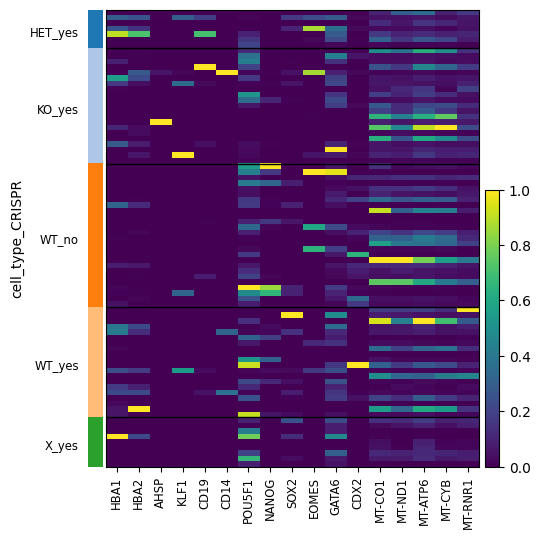

In [32]:
# Print Figure
sc.pl.heatmap(adata, var_names=erythroid_markers + immune_markers + embryonic_markers + mt_markers, 
              groupby= ['cell_type', 'CRISPR'], standard_scale='var', show_gene_labels=True,
             show= False)
plt.savefig('Fig/Fogarty_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
# Create a mask for genes to keep (NOT mitochondrial AND NOT ribosomal)
#genes_to_keep = ~(adata.var["mt"] | adata.var["ribo"])

# Filter the data to remove mt and ribosomal genes
#adata = adata[:, genes_to_keep].copy()

In [ ]:
# Filter cells with low genes and filter genes present in less than two cells
#sc.pp.filter_cells(adata, min_genes=100)
#sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# regress
#sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [ ]:
# Recheck after mt filtering
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

sc.pl.heatmap(adata, var_names= embryonic_markers, 
              groupby= ['cell_type', 'CRISPR'], standard_scale='var', show_gene_labels=True)

In [ ]:
adata

In [ ]:
# Detect doublets (two cells captured as one)
# NO batches in this data
# First convert the index to a regular column
#sc.pp.scrublet(adata, batch_key='smp_ID')

In [ ]:
# Store different processing steps in layers
#adata.layers['counts'] = adata.X.copy()  # Original counts

# Optional QC

In [ ]:
# Normalize the data (log1p normalization)
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
#adata.layers['norm'] = adata.X.copy() # Normalized data

In [ ]:
# Identify highly variable genes
#sc.pp.highly_variable_genes(adata)

#sc.pl.highly_variable_genes(adata)

In [ ]:
# Scale for clustering purposes
#sc.pp.scale(adata, max_value=10)
#adata.layers['scaled'] = adata.X.copy()  # Scaled data

In [ ]:
# PCA
#sc.tl.pca(adata)

In [ ]:
#sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [ ]:
#sc.pl.pca(
#    adata,
#    color=["smp_ID", "smp_ID", "pct_counts_mt", "pct_counts_mt"],
#    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
#    ncols=2,
#    size=50,
#)


In [ ]:
# Nearest neighbors
#sc.pp.neighbors(adata)

In [ ]:
# umap
#sc.tl.umap(adata)

In [ ]:
#sc.pl.umap(
#    adata,
#    color="smp_ID",
    # Setting a smaller point size to get prevent overlap
#    size=50,
#)

In [ ]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
#sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

In [ ]:
#sc.pl.umap(adata, color=["leiden"])

In [ ]:
#sc.pl.umap(
#    adata,
#    color=["leiden", "cell_type", "CRISPR", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
#    wspace=0.1,
#    ncols=3,
#)

# Filtering data to only WT and no CRISPR

In [33]:
# Scale the data (zero mean, unit variance)
sc.pp.scale(adata)

In [34]:
# Filter the AnnData object
adata_filtered = adata[
    (adata.obs['cell_type'] == 'WT') & 
    (adata.obs['CRISPR'] == 'no')
]

# Print information about the filtered object
print(f"Original number of cells: {adata.n_obs}")
print(f"Filtered number of cells: {adata_filtered.n_obs}")
print(f"Number of genes: {adata_filtered.n_vars}")

# If you want to save the filtered object
#adata_filtered.write('filtered_Fogarty_wt_no_crispr.h5ad')

Original number of cells: 83
Filtered number of cells: 26
Number of genes: 15036


In [ ]:
adata_filtered.obs.head(26)

# Run GenKI

In [ ]:
# load data
data_wrapper =  DataLoader(
                adata_filtered, # adata object
                target_gene = ["POU5F1"], # KO gene name
                target_cell = None, # obsname for cell type, if none use all
                obs_label = "ident", # colname for genes
                GRN_file_dir = "GRNs", # folder name for GRNs
                rebuild_GRN = True, # whether build GRN by pcNet # Switch between load & save
                pcNet_name = "pcNet_5", # GRN file name
                verbose = True, # whether verbose
                n_cpus = 8, # multiprocessing
                )

data_wt = data_wrapper.load_data()
data_ko = data_wrapper.load_kodata()

In [ ]:
# init trainer

hyperparams = {"epochs": 100, 
               "lr": 7e-4, 
               "beta": 1e-4, 
               "seed": 8096}
log_dir=None 

sensei = VGAE_trainer(data_wt, 
                     epochs=hyperparams["epochs"], 
                     lr=hyperparams["lr"], 
                     log_dir=log_dir, 
                     beta=hyperparams["beta"],
                     seed=hyperparams["seed"],
                     verbose=False,
                     )

In [ ]:
#%%timeit
sensei.train()

In [ ]:
 sensei.save_model('model')

In [ ]:
#sensei.load_model('model')

In [ ]:
# get distance between wt and ko

z_mu_wt, z_std_wt = sensei.get_latent_vars(data_wt)
z_mu_ko, z_std_ko = sensei.get_latent_vars(data_ko)
dis = gk.utils.get_distance(z_mu_ko, z_std_ko, z_mu_wt, z_std_wt, by="KL")
print(dis.shape)

In [ ]:
# raw ranked gene list

res_raw = utils.get_generank(data_wt, dis, rank=True)
res_raw.head()

In [ ]:
res_raw.to_csv("geneKi_list.csv")

In [ ]:
# if permutation test
null = sensei.pmt(data_ko, n=100, by="KL")
res = utils.get_generank(data_wt, dis, null,)
#                       save_significant_as = 'gene_list_example')
res

In [ ]:
res.to_csv("geneKi_per.csv")